In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [4]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [5]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Model 2

    2 Dense layers(also known as fully connected layers), trained for 100 epochs

In [7]:
# Lets Create model 2

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis= -1), y, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 50.2611 - mae: 50.2611
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 30.2989 - mae: 30.2989
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 47.6997 - mae: 47.6997
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 11.0737 - mae: 11.0737
Epoch 5/100
2/2 [==============================] - 0s 999us/step - loss: 21.4530 - mae: 21.4530
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9259 - mae: 9.9259
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 26.7646 - mae: 26.7646
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 10.7766 - mae: 10.7766
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 10.0257 - mae: 10.0257
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1488 - mae: 10.1488
Epoch 11/100
2/2 [==============================] - 0s 3ms/s

In [8]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 48ms/step


array([[ 88.34838 ],
       [ 94.12606 ],
       [ 99.90375 ],
       [105.68142 ],
       [111.459114],
       [117.23681 ],
       [123.01448 ],
       [128.79218 ],
       [134.56985 ],
       [140.34753 ]], dtype=float32)

In [9]:
# Create a plotting function 

def plot_pred(train_data = X_train,
              test_data = X_test,
              train_label = y_train,
              test_label = y_test,
              prediction = y_pred_2):
    
    # plot 
    
    plt.figure(figsize=(15,10))
    
    # Plot the Training Data in light green
    plt.scatter(train_data, train_label, label="Training Data", c="lime")
    
    # Plot the Testing Data in cyan
    plt.scatter(test_data, test_label, label="Testing Data", c="cyan")
    
    # Plot the predictions in orange
    plt.scatter(test_data, prediction, label="Prediction", c="orange")
    
    # Legend
    plt.legend()
    plt.show()

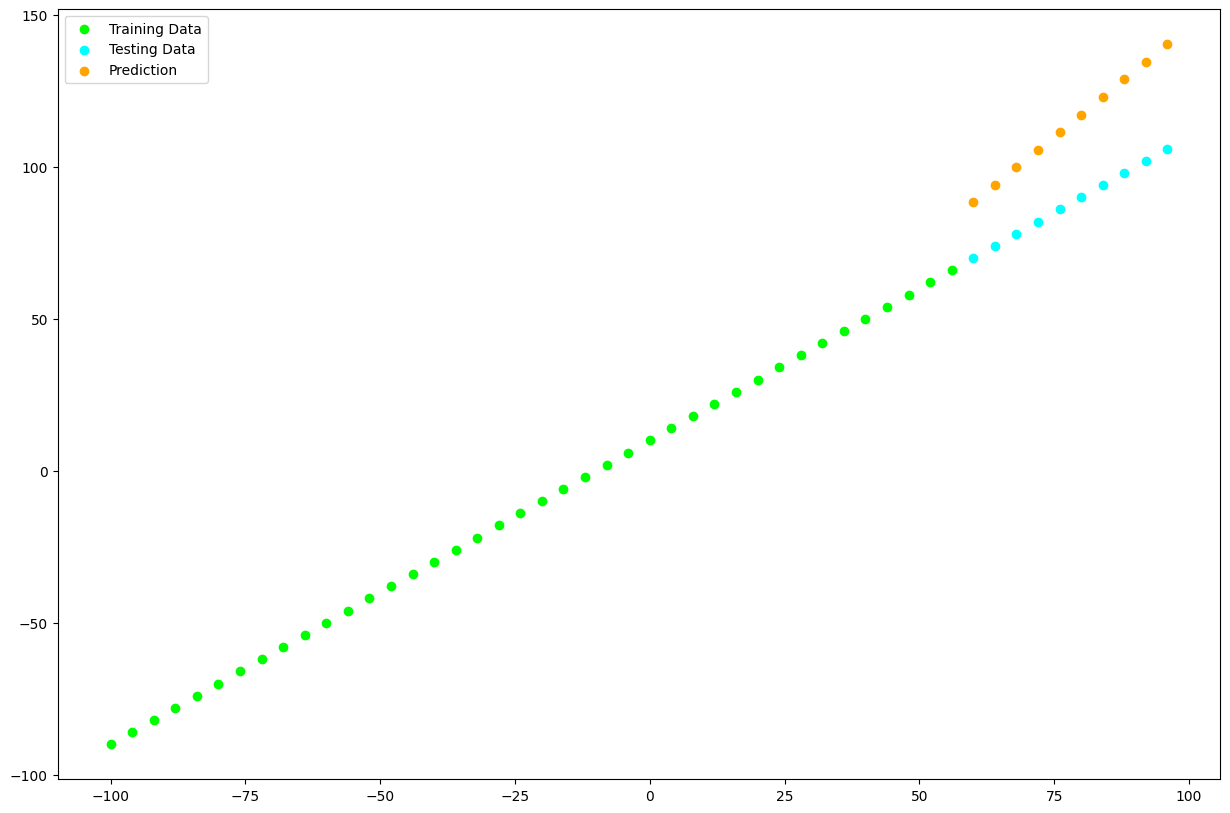

In [10]:
plot_pred(prediction=y_pred_2)

In [11]:
y_true = y_test
y_true

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [12]:
# Create evaluation function
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))    

In [13]:
mae_2 = mae(y_test, y_pred_2)
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=26.347958>

In [14]:
mse_2 = mse(y_test, y_pred_2)
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=720.2862>